In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -700, 700)))

In [3]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1/m) * np.dot(X.T, (h - y))
        theta -= learning_rate * gradient
    return theta

In [4]:
def calculate_accuracy(X_test, y_test, theta):
    y_pred_proba = sigmoid(np.dot(X_test, theta))
    y_pred = np.round(y_pred_proba)
    accuracy = np.mean(y_pred == y_test)
    return accuracy

In [5]:
def k_fold_cross_validation(X, y, k, learning_rate, iterations):
    np.random.seed(42)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        # Add a column of ones to X for the intercept term
        X_train = np.c_[np.ones(len(X_train)), X_train]
        X_test = np.c_[np.ones(len(X_test)), X_test]

        # Initialize theta with zeros
        theta = np.zeros(X_train.shape[1])

        # Train the model
        theta = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

        # Calculate accuracy
        accuracy = calculate_accuracy(X_test, y_test, theta)
        accuracies.append(accuracy)

    return np.mean(accuracies)

In [6]:
# Load the Dataset
df = pd.read_csv('train.csv')

In [7]:
# Feature Selection
X = df.drop('is_claim', axis=1)
y = df['is_claim']

In [8]:
# Initialize parameters
k_values = range(2, 11)  # Test k from 2 to 10
best_k = None
best_accuracy = 0
results = {}

In [9]:
# Open a file for writing output
with open('./output/output_file.txt', 'w') as output_file:
    # Implement manual k-fold cross-validation and accuracy calculation
    for k in k_values:
        mean_accuracy = k_fold_cross_validation(X, y, k, learning_rate=0.01, iterations=1000)
        results[k] = mean_accuracy

        # Write outputs to the file
        output_file.write(f"Results for K={k}:\n")
        output_file.write(f"Accuracy: {mean_accuracy}\n\n")

        # Update best k and accuracy
        if mean_accuracy > best_accuracy:
            best_k = k
            best_accuracy = mean_accuracy

In [10]:
# Print results for the best k
print(f"Best K: {best_k}")
print(f"Best Accuracy: {best_accuracy}")

Best K: 6
Best Accuracy: 0.9356405585913784


In [11]:
# Print completion message
print("Output written to 'output_file.txt'")

Output written to 'output_file.txt'


In [12]:
# Extract k values and corresponding accuracies for plotting
k_values = list(results.keys())
accuracies = list(results.values())

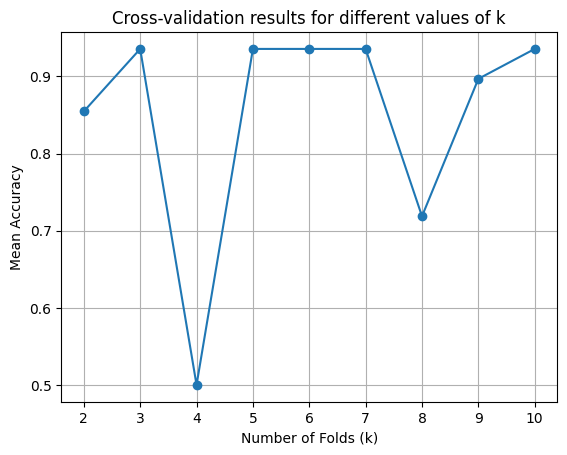

In [13]:
# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.title('Cross-validation results for different values of k')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()